<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Modules-for-this-notebook" data-toc-modified-id="Modules-for-this-notebook-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Modules for this notebook</a></span></li></ul></li><li><span><a href="#Eigenvector-Centrality" data-toc-modified-id="Eigenvector-Centrality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Eigenvector Centrality</a></span><ul class="toc-item"><li><span><a href="#Normalisation" data-toc-modified-id="Normalisation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Normalisation</a></span></li><li><span><a href="#Computing-Eigenvalues" data-toc-modified-id="Computing-Eigenvalues-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Computing Eigenvalues</a></span></li></ul></li><li><span><a href="#Eigenvalues-of-adjacency-matrices" data-toc-modified-id="Eigenvalues-of-adjacency-matrices-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Eigenvalues of adjacency matrices</a></span><ul class="toc-item"><li><span><a href="#Example-1:-$G=C_5$" data-toc-modified-id="Example-1:-$G=C_5$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example 1: $G=C_5$</a></span></li><li><span><a href="#Example-1:-$G=P_5$" data-toc-modified-id="Example-1:-$G=P_5$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example 1: $G=P_5$</a></span></li><li><span><a href="#Example-3" data-toc-modified-id="Example-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Example 3</a></span></li></ul></li><li><span><a href="#The-Power-Method" data-toc-modified-id="The-Power-Method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Power Method</a></span></li></ul></div>

<h1>CS4423-Networks: Week 6 (19+20 Feb 2025) 

# Part 3: Eigenvector Centrality - Computation
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway


This Jupyter notebook, and PDF and HTML versions, can be found at https://www.niallmadden.ie/2425-CS4423/#Week06

<div class="rc"><font size="-1"><em>This notebook was written by Niall Madden, adapted from notebooks by Angela Carnevale.</em></div>

### Modules for this notebook

In [1]:
import networkx as nx
import numpy as np
opts = { "with_labels": True,  "node_color": "xkcd:sky blue"} # show labels; nodes are sky blue

np.set_printoptions(precision=3)    # just display arrays to 3 decimal places
np.set_printoptions(suppress=True)  # avoid scientific notation (better for matrices)

## Eigenvector Centrality

So now we know (see `CS4423-W06-Part-2.pdf`) 
* The  adjacency matrix, $A$ of a connected graph, $G$, is an irreducible non-negative matrix.
* So the P-F Therom applies to it
* So $A$ has an eigenvalue that is real and positive, and greater than the modulus of any other.
* It has a corresponding positive eigenvector,  $\vec v$.
* $v_i$ is the Eigenvector Centrality node $i$.




### Normalisation

One minor issue is that any multiple of $\vec v$ is also an eigenvector for the same eigenvalue. This is not a major problem: we are mainly interested in if, for example $v_i > v_j$ which would mean that Node $i$  has greater centrality than Node $j$. 

Nonetheless, by convection we choose  $\vec v$  so that 
* $\vec v >0$ (already discussed)
* $\vec v^T \vec v =1$ (equivalently, $\|\vec v\|_2 = \sqrt{v_1^2 + v_2^2 + \dots v_n^2} =1$

We say such an eigenvector is **normalised**.



### Computing Eigenvalues

Presently, we'll learn about a method called the **Power Method** 

For now, though, we'll use the `np.linalg.eig()` which computes the eigenvalues and eigenvectors of a matrix:\
`l, V = np.linalg.eig(A)`
computes 
* `l` : an array of length $n$ containing the eigenvalues of $A$. (Note: we can't call this array `lambda`, since that is a keyword in Python.
* `V`: a $n \times n$ matrix; column $i$ of $V$ is the eigenvector corresponding to the eigenvalues $\lambda_i$.

**Example**: Find the eigenvalues and corresponding eigenvectors of 
$$ A = \begin{pmatrix} 2 & 2 \\ 3 & 1\end{pmatrix}$$

In [2]:
A = np.array([[2,2],[3,1]])
l, V = np.linalg.eig(A)
print(f"The eigenvalues of A are {l[0]} and {l[1]}.")
print(f"The corresponding eigenvectors are {V[:,0]} and {V[:,1]}")

The eigenvalues of A are 4.0 and -1.0.
The corresponding eigenvectors are [0.707 0.707] and [-0.555  0.832]


Let's check if this worked:

In [3]:
print(A@V[:,0])
print(l[0]*V[:,0])

[2.828 2.828]
[2.828 2.828]


Let's check if the columns of `V` are normalised:

In [4]:
print(f" ||v|| = {np.linalg.norm(V[:,1])}")

 ||v|| = 1.0


## Eigenvalues of adjacency matrices

Let's look at some examples, for which we may have an intuition for the centrality. we want to check that
* there is a dominant positive eigenvalue
* there is a corresponding positive eigenvector 
* the centrality values seem "sensible"

(Note: *Extra details given on the white board!*)

### Example 1: $G=C_5$


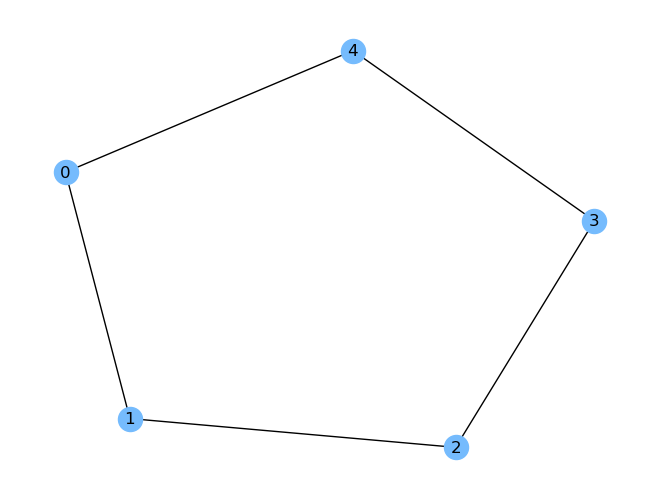

In [19]:
G = nx.cycle_graph(5)
nx.draw(G, **opts)

In [20]:
A = nx.adjacency_matrix(G).toarray()
l, V = np.linalg.eig(A)
for i in range(G.order()):
    print(f"eigenvalue {l[i]:6.3f} has eigenvectors are {V[:,i]}")

eigenvalue -1.618 has eigenvectors are [ 0.632 -0.512  0.195  0.195 -0.512]
eigenvalue  0.618 has eigenvectors are [-0.632 -0.195  0.512  0.512 -0.195]
eigenvalue  2.000 has eigenvectors are [-0.447 -0.447 -0.447 -0.447 -0.447]
eigenvalue -1.618 has eigenvectors are [-0.032  0.397 -0.611  0.591 -0.345]
eigenvalue  0.618 has eigenvectors are [ 0.074  0.62   0.309 -0.429 -0.575]


### Example 1: $G=P_5$

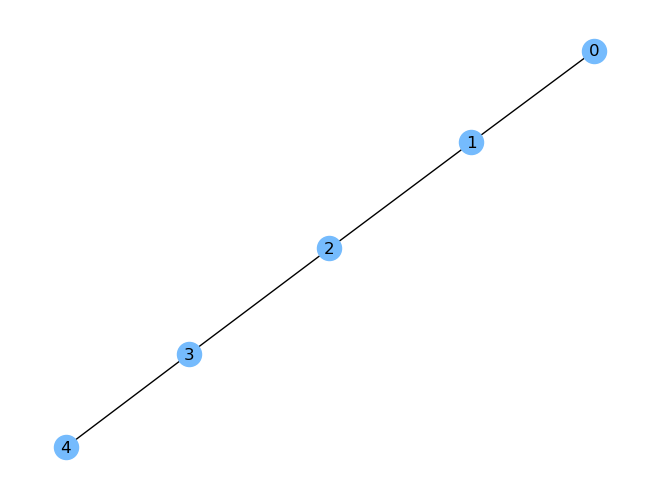

In [21]:
G = nx.path_graph(5)
nx.draw(G, **opts)

In [23]:
A = nx.adjacency_matrix(G).toarray()
print(A)
l, V = np.linalg.eig(A)
#print(l)
for i in range(G.order()):
    print(f"eigenvalue {l[i]:6.3f} has eigenvectors are {V[:,i]}")

[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]
eigenvalue  1.732 has eigenvectors are [0.289 0.5   0.577 0.5   0.289]
eigenvalue -1.732 has eigenvectors are [-0.289  0.5   -0.577  0.5   -0.289]
eigenvalue -1.000 has eigenvectors are [-0.5  0.5 -0.  -0.5  0.5]
eigenvalue -0.000 has eigenvectors are [ 0.577 -0.    -0.577  0.     0.577]
eigenvalue  1.000 has eigenvectors are [-0.5 -0.5 -0.   0.5  0.5]


### Example 3

Let's look at the eigenvalues of an adjacency matrix of a graph. It is constructed so that node $0$ is more "central" than any of the others, node $5$ is the least "central".

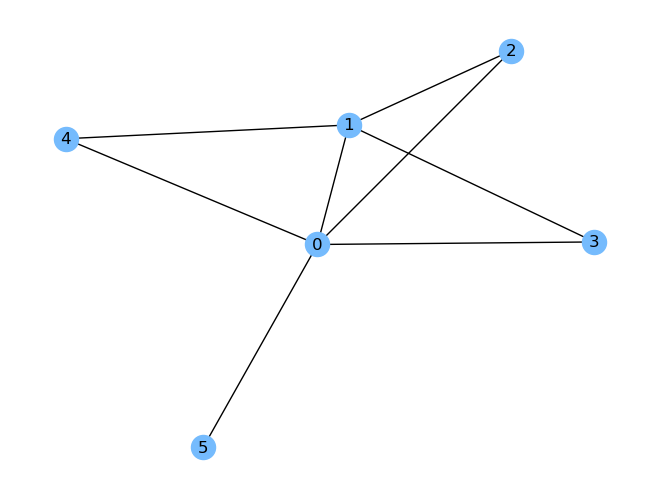

In [15]:
G = nx.Graph(["01", "02", "03", "04", "05", "12", "13", "14"])
nx.draw(G, **opts)

In [16]:
A  = nx.adjacency_matrix(G).toarray()
print(A)

[[0 1 1 1 1 1]
 [1 0 1 1 1 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]]


In [17]:
l, V = np.linalg.eig(A)
print(f"The eigenpairs of A are:")
for i in range(5):
    print(f"Eigenvalue {l[i]:8.3f} with eigenvector {V[:,i]}")

The eigenpairs of A are:
Eigenvalue    3.102 with eigenvector [0.568 0.523 0.352 0.352 0.352 0.183]
Eigenvalue    0.344 with eigenvector [ 0.296 -0.343 -0.138 -0.138 -0.138  0.859]
Eigenvalue   -2.123 with eigenvector [-0.557 -0.324  0.415  0.415  0.415  0.262]
Eigenvalue   -1.323 with eigenvector [ 0.529 -0.71   0.137  0.137  0.137 -0.4  ]
Eigenvalue   -0.000 with eigenvector [-0.    -0.    -0.509  0.807 -0.298 -0.   ]


## The Power Method

There are subfields in the *Numerical Linerar Algebra* dedicated to computing estimates for eigenvalues and eigenvectors. When we only need one eigenvalue, and it is the largest,    use the **[Power method](https://en.wikipedia.org/wiki/Power_iteration)**:

1. start with any $u = (1, 1, \dots, 1)$, say;

2. keep replacing $u \gets Au$ until $u/\|u\|$ becomes stable ...

**Questions** Does this work? Meaning:
* Does the sequence actually converge?
* Does it return the correct values?


In [ ]:
n = G.order()
u = np.ones((n,1)); u=u/np.linalg.norm(u)
for i in range(10):
    u = A @ u
    u = u/np.linalg.norm(u)

In [ ]:
print(u)

In [ ]:
print(V)

<div class="alert alert-block alert-info">Finished here <b>Thursday</b></div>